In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

In [240]:
data1 = pd.read_excel("DS Internship - Modeling - Data.xlsx", sheet_name = "Data")
pd.set_option('display.max_columns', None)
data1.describe(include = "all")

,Store ID,Pop class,Sales,Centre Type,Climate,Total Store Sq Ft,Sales Floor Sq Ft,Girls Sq Ft,Guys Sq Ft,Accessories Sq Ft,Guys Segmentation,Girls Segmentation,ChangeMade,ChangeDate,Population Est CrYr,Transient Pop Est,Seasonal Pop Est,Sex Males CrYr,Sex Females CrYr,Age Average CrYr,Unemployment Rate,Average Household Income CrYr,Householder under 25 years:,Householder 25 to 44 years:,Family Inc: Aggregate Average,Per Capita Income CrYr,Wealth: Average Household,Poverty: In poverty,Male 14 to 35 CrYr,Female 14 to 35 CrYr,Total Pop 14 to 35 CrYr,Under 25 Low Income,Under 25 Med Income,Under 25 High Income,25 to 44 Low Income,25 to 44 Med Income,25 to 44 High Income
count,691.00,691,691.00,691,691,691.00,691.00,685.00,686.00,685.00,691,691,691,279,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00,691.00
unique,NaN,3,NaN,3,5,NaN,NaN,NaN,NaN,NaN,3,2,4,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Urban,NaN,Mall,Warm,NaN,NaN,NaN,NaN,NaN,On Trend,Fashion Forward,no change,2019-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,500,NaN,347,208,NaN,NaN,NaN,NaN,NaN,341,346,412,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,346.00,NaN,1563810.07,NaN,NaN,6434.29,5584.35,2542.22,1234.18,1085.42,NaN,NaN,NaN,NaN,290570.63,4915.91,2726.96,142664.81,147905.80,38.49,4.65,70785.44,4530.02,39349.61,6122899645.18,27633.82,40364452.54,15377.20,42021.54,40406.55,82428.09,2234.53,1769.02,526.48,8392.38,14968.86,15988.34
std,199.62,NaN,458423.43,NaN,NaN,1376.32,1303.36,461.37,244.95,259.18,NaN,NaN,NaN,NaN,569740.31,12156.62,9785.90,280857.45,288933.59,2.60,1.49,14292.04,7961.47,79909.95,13049980018.37,5579.33,78412491.49,28085.49,81778.43,78385.88,160155.59,3727.27,3198.94,1159.52,15489.40,28798.31,36875.35
min,1.00,NaN,737662.31,NaN,NaN,3212.60,2417.30,1205.10,618.80,179.90,NaN,NaN,NaN,NaN,1701.00,0.00,0.00,864.00,837.00,30.00,1.80,42336.00,41.00,151.00,37075999.00,13679.00,286379.00,48.00,231.00,218.00,449.00,1.00,9.00,0.00,26.00,72.00,53.00
25%,173.50,NaN,1222169.73,NaN,NaN,5330.10,4515.55,2183.00,1063.47,945.50,NaN,NaN,NaN,NaN,52969.00,605.50,206.50,25907.00,27848.50,37.00,3.60,60422.50,960.50,6629.50,944897552.00,23615.00,7347354.00,3241.00,7972.00,7732.00,15965.00,442.00,346.00,68.50,1683.50,2739.50,1922.50
50%,346.00,NaN,1483150.17,NaN,NaN,6170.50,5252.00,2489.90,1218.30,1109.40,NaN,NaN,NaN,NaN,116876.00,1518.00,508.00,57690.00,59627.00,38.50,4.40,68208.00,2193.00,15988.00,2210515337.00,26924.00,16074017.00,6940.00,17538.00,17280.00,34634.00,1081.00,826.00,186.00,3587.00,6421.00,5220.00
75%,518.50,NaN,1817553.06,NaN,NaN,7576.30,6739.20,2835.30,1381.10,1234.80,NaN,NaN,NaN,NaN,269102.00,3995.00,1234.00,133768.00,138320.50,40.20,5.40,78138.00,4786.50,36911.50,5619048952.00,30631.50,38698311.00,14833.00,39789.00,38521.50,78373.50,2270.00,1906.50,493.00,8307.00,14766.00,14390.00


In [241]:
to_drop = ["Pop class", "ChangeMade", "ChangeDate", "Store ID"]
data1 = data1.drop(columns = to_drop)
data1.isnull().sum()

Sales                            0
Centre Type                      0
Climate                          0
Total Store Sq Ft                0
Sales Floor Sq Ft                0
Girls Sq Ft                      6
Guys Sq Ft                       5
Accessories Sq Ft                6
Guys Segmentation                0
Girls Segmentation               0
Population Est CrYr              0
Transient Pop Est                0
Seasonal Pop Est                 0
Sex Males CrYr                   0
Sex Females CrYr                 0
Age Average CrYr                 0
Unemployment Rate                0
Average Household Income CrYr    0
Householder under 25 years:      0
Householder 25 to 44 years:      0
Family Inc: Aggregate Average    0
Per Capita Income CrYr           0
Wealth: Average Household        0
Poverty: In poverty              0
Male 14 to 35 CrYr               0
Female 14 to 35 CrYr             0
Total Pop 14 to 35 CrYr          0
Under 25 Low Income              0
Under 25 Med Income 

In [242]:
data1 = data1.dropna(axis = 0)
data1.describe(include = "all")

,Sales,Centre Type,Climate,Total Store Sq Ft,Sales Floor Sq Ft,Girls Sq Ft,Guys Sq Ft,Accessories Sq Ft,Guys Segmentation,Girls Segmentation,Population Est CrYr,Transient Pop Est,Seasonal Pop Est,Sex Males CrYr,Sex Females CrYr,Age Average CrYr,Unemployment Rate,Average Household Income CrYr,Householder under 25 years:,Householder 25 to 44 years:,Family Inc: Aggregate Average,Per Capita Income CrYr,Wealth: Average Household,Poverty: In poverty,Male 14 to 35 CrYr,Female 14 to 35 CrYr,Total Pop 14 to 35 CrYr,Under 25 Low Income,Under 25 Med Income,Under 25 High Income,25 to 44 Low Income,25 to 44 Med Income,25 to 44 High Income
count,685.00,685,685,685.00,685.00,685.00,685.00,685.00,685,685,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00,685.00
unique,NaN,3,5,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Mall,Warm,NaN,NaN,NaN,NaN,NaN,On Trend,Fashion Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,347,206,NaN,NaN,NaN,NaN,NaN,341,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1567564.75,NaN,NaN,6447.08,5596.38,2542.22,1234.72,1085.42,NaN,NaN,292704.10,4955.58,2749.29,143715.22,148988.86,38.49,4.65,70800.81,4563.58,39639.33,6167726686.63,27636.25,40664293.27,15492.74,42329.87,40702.05,83031.92,2251.01,1782.03,530.54,8455.08,15076.59,16107.63
std,458330.79,NaN,NaN,1375.13,1302.39,461.37,244.73,259.18,NaN,NaN,571772.33,12202.36,9825.79,281859.77,289963.54,2.60,1.48,14304.78,7988.16,80198.94,13098140158.06,5587.77,78689593.63,28181.03,82069.22,78664.57,160725.01,3739.38,3209.88,1163.77,15542.51,28901.03,37014.18
min,737662.31,NaN,NaN,3212.60,2417.30,1205.10,618.80,179.90,NaN,NaN,1701.00,0.00,0.00,864.00,837.00,30.00,1.80,42336.00,41.00,151.00,37075999.00,13679.00,286379.00,48.00,231.00,218.00,449.00,1.00,9.00,0.00,26.00,72.00,53.00
25%,1228734.34,NaN,NaN,5400.50,4546.90,2183.00,1064.30,945.50,NaN,NaN,53619.00,619.00,210.00,26177.00,27977.00,37.00,3.60,60426.00,966.00,6686.00,951552145.00,23626.00,7490427.00,3363.00,8032.00,7830.00,16005.00,448.00,348.00,69.00,1745.00,2745.00,1963.00
50%,1485645.02,NaN,NaN,6188.10,5263.00,2489.90,1218.30,1109.40,NaN,NaN,120832.00,1530.00,518.00,58519.00,60863.00,38.50,4.40,68209.00,2209.00,16400.00,2245549893.00,26924.00,16173597.00,7047.00,17875.00,17559.00,34900.00,1094.00,834.00,189.00,3646.00,6534.00,5309.00
75%,1820624.73,NaN,NaN,7582.90,6740.30,2835.30,1381.10,1234.80,NaN,NaN,274013.00,4080.00,1242.00,134210.00,139092.00,40.20,5.40,78135.00,4788.00,37094.00,5633872210.00,30627.00,39003646.00,14951.00,40302.00,38913.00,79417.00,2276.00,1916.00,498.00,8349.00,15120.00,14643.00


In [243]:
x = data1.drop(columns=["Sales"])
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = data1[numerical_cols].corr().abs()
high_corr = corr_matrix[corr_matrix > 0.99]
print(high_corr)

                               Total Store Sq Ft  Sales Floor Sq Ft  \
Total Store Sq Ft                           1.00                NaN   
Sales Floor Sq Ft                            NaN               1.00   
Girls Sq Ft                                  NaN                NaN   
Guys Sq Ft                                   NaN                NaN   
Accessories Sq Ft                            NaN                NaN   
Population Est CrYr                          NaN                NaN   
Transient Pop Est                            NaN                NaN   
Seasonal Pop Est                             NaN                NaN   
Sex Males CrYr                               NaN                NaN   
Sex Females CrYr                             NaN                NaN   
Age Average CrYr                             NaN                NaN   
Unemployment Rate                            NaN                NaN   
Average Household Income CrYr                NaN                NaN   
Househ

In [244]:
to_drop = ["Sex Males CrYr", "Sex Females CrYr", "Male 14 to 35 CrYr", "Female 14 to 35 CrYr", "Total Pop 14 to 35 CrYr",
            "25 to 44 Med Income", "25 to 44 Low Income"]

data1 = data1.drop(columns = to_drop)
x = data1.drop(columns=["Sales"])
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns

In [245]:
variables = x[numerical_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,813.15,Total Store Sq Ft
1,645.61,Sales Floor Sq Ft
2,124.92,Girls Sq Ft
3,56.43,Guys Sq Ft
4,37.25,Accessories Sq Ft
5,1136.62,Population Est CrYr
6,3.17,Transient Pop Est
7,1.44,Seasonal Pop Est
8,106.34,Age Average CrYr
9,15.63,Unemployment Rate


In [246]:
pd.set_option('display.float_format', '{:.2f}'.format)
vif

,VIF,Features
0,813.15,Total Store Sq Ft
1,645.61,Sales Floor Sq Ft
2,124.92,Girls Sq Ft
3,56.43,Guys Sq Ft
4,37.25,Accessories Sq Ft
5,1136.62,Population Est CrYr
6,3.17,Transient Pop Est
7,1.44,Seasonal Pop Est
8,106.34,Age Average CrYr
9,15.63,Unemployment Rate


In [247]:
to_drop = ["Total Store Sq Ft", "Sales Floor Sq Ft", "Population Est CrYr", "Householder under 25 years:", "Householder 25 to 44 years:",
           "Family Inc: Aggregate Average", "Per Capita Income CrYr", "Average Household Income CrYr", "Under 25 Low Income", "Under 25 Med Income",
           "Under 25 High Income", "Age Average CrYr", "Poverty: In poverty", "25 to 44 High Income"]

data1 = data1.drop(columns = to_drop)
x = data1.drop(columns=["Sales"])
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns

In [248]:
variables = x[numerical_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,39.49,Girls Sq Ft
1,46.49,Guys Sq Ft
2,29.58,Accessories Sq Ft
3,2.10,Transient Pop Est
4,1.31,Seasonal Pop Est
5,8.54,Unemployment Rate
6,2.20,Wealth: Average Household


In [249]:
to_drop = ["Girls Sq Ft", "Guys Sq Ft", "Accessories Sq Ft"]
data1 = data1.drop(columns = to_drop)
x = data1.drop(columns=["Sales"])
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns

In [250]:
variables = x[numerical_cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.10,Transient Pop Est
1,1.29,Seasonal Pop Est
2,1.22,Unemployment Rate
3,2.17,Wealth: Average Household


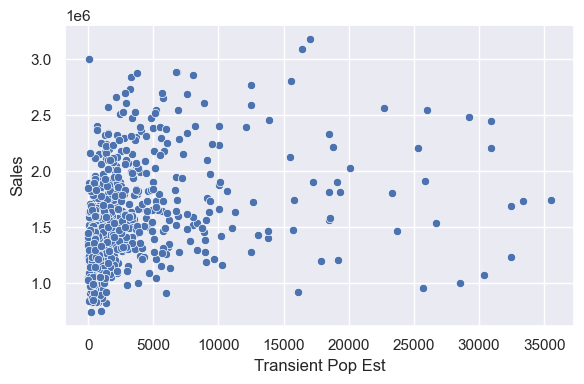

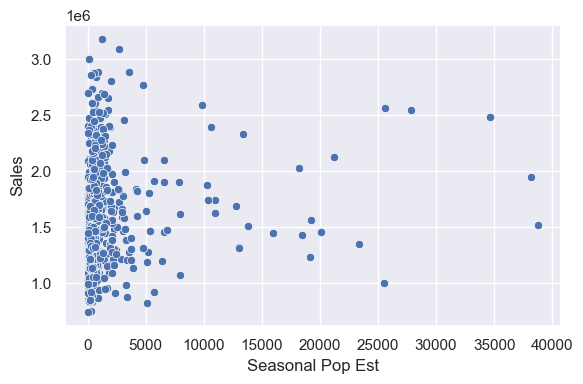

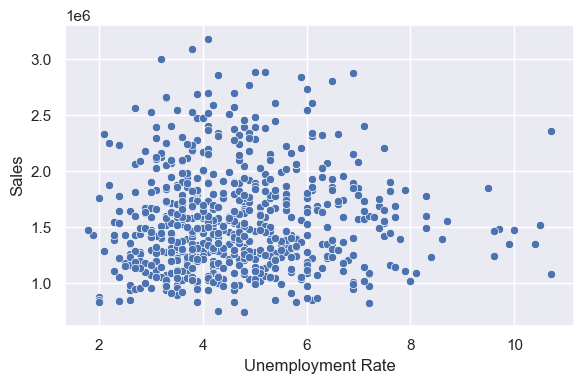

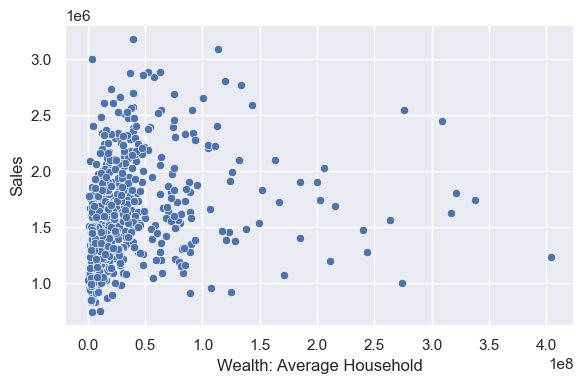

In [251]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x = data1[col], y = y)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.tight_layout()

<Axes: xlabel='Wealth: Average Household', ylabel='Count'>

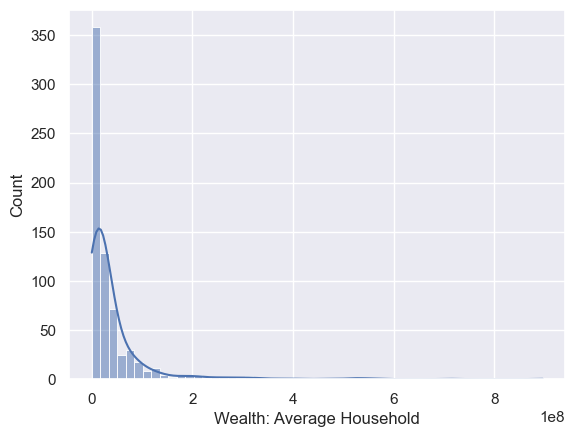

In [252]:
sns.histplot(data1["Wealth: Average Household"], kde = True)

<Axes: xlabel='Log Wealth', ylabel='Count'>

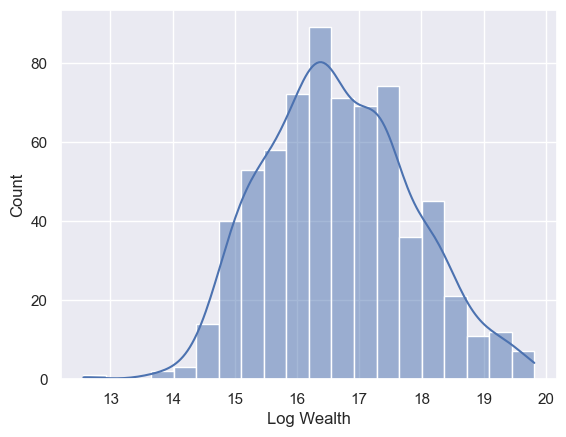

In [253]:
q = data1["Wealth: Average Household"].quantile(0.99)
data1 = data1[data1["Wealth: Average Household"] < q]
log_wealth = np.log(data1["Wealth: Average Household"])
data1["Log Wealth"] = log_wealth
sns.histplot(data1["Log Wealth"], kde = True)

<Axes: xlabel='Transient Pop Est', ylabel='Count'>

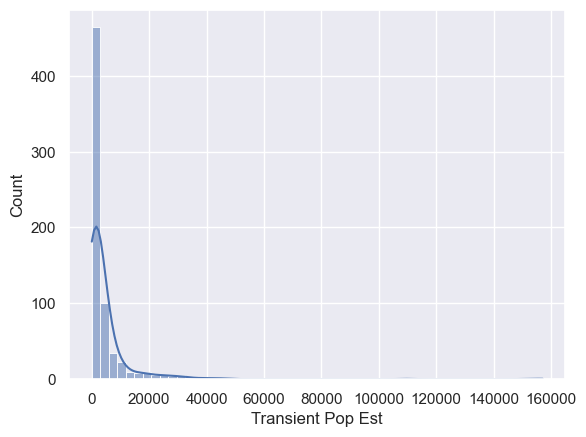

In [254]:
sns.histplot(data1["Transient Pop Est"], kde = True)

<Axes: xlabel='Log Trans', ylabel='Count'>

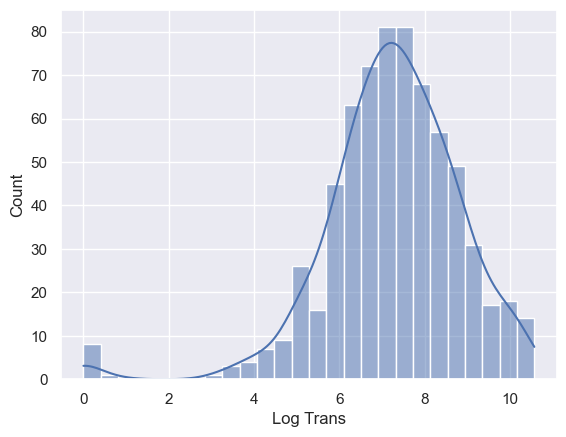

In [255]:
q = data1["Transient Pop Est"].quantile(0.99)
data1 = data1[data1["Transient Pop Est"] < q]
log_trans = np.log1p(data1["Transient Pop Est"])
data1["Log Trans"] = log_trans
sns.histplot(data1["Log Trans"], kde = True)

<Axes: xlabel='Seasonal Pop Est', ylabel='Count'>

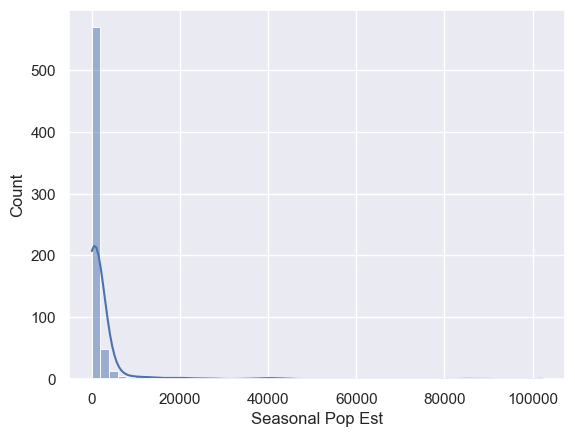

In [256]:
sns.histplot(data1["Seasonal Pop Est"], kde = True)

<Axes: xlabel='Log Season', ylabel='Count'>

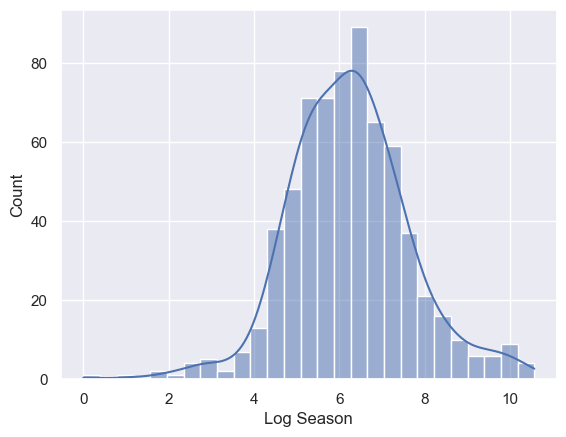

In [257]:
q = data1["Seasonal Pop Est"].quantile(0.99)
data1 = data1[data1["Seasonal Pop Est"] < q]
log_season = np.log1p(data1["Seasonal Pop Est"])
data1["Log Season"] = log_season
sns.histplot(data1["Log Season"], kde = True)

<Axes: xlabel='Unemployment Rate', ylabel='Count'>

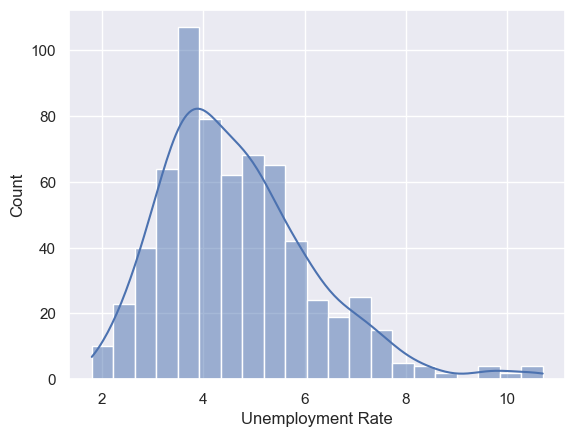

In [258]:
sns.histplot(data1["Unemployment Rate"], kde = True)

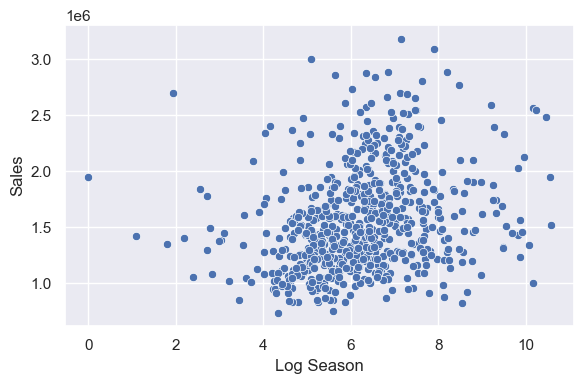

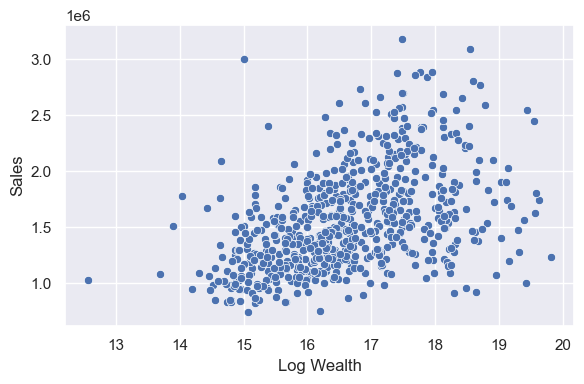

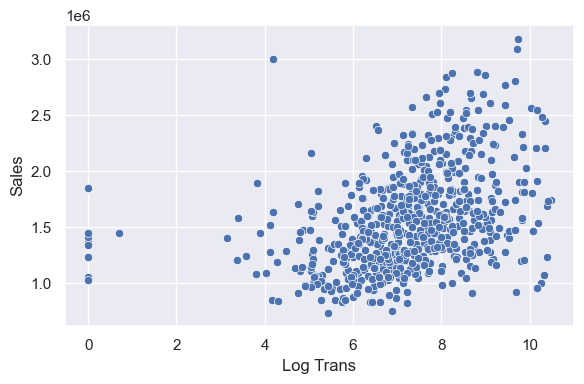

In [260]:
for col in ["Log Season", "Log Wealth", "Log Trans"]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x = data1[col], y = y)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.tight_layout()

In [261]:
data1 = data1.drop(["Seasonal Pop Est", "Transient Pop Est", "Wealth: Average Household"], axis = 1)
data1.describe(include = "all")

,Sales,Centre Type,Climate,Guys Segmentation,Girls Segmentation,Unemployment Rate,Log Wealth,Log Trans,Log Season
count,664.00,664,664,664,664,664.00,664.00,664.00,664.00
unique,NaN,3,5,3,2,NaN,NaN,NaN,NaN
top,NaN,Mall,Warm,On Trend,Fashion Forward,NaN,NaN,NaN,NaN
freq,NaN,345,202,332,333,NaN,NaN,NaN,NaN
mean,1556941.74,NaN,NaN,NaN,NaN,4.66,16.63,7.22,6.23
std,448245.84,NaN,NaN,NaN,NaN,1.50,1.15,1.58,1.41
min,737662.31,NaN,NaN,NaN,NaN,1.80,12.57,0.00,0.00
25%,1226905.23,NaN,NaN,NaN,NaN,3.60,15.79,6.39,5.32
50%,1478145.38,NaN,NaN,NaN,NaN,4.40,16.55,7.27,6.19
75%,1806568.82,NaN,NaN,NaN,NaN,5.50,17.41,8.21,7.05


In [262]:
data1["Guys Segmentation"].unique()

array(['On Trend', 'Fashion Forward', 'On trend'], dtype=object)

In [263]:
data1['Guys Segmentation'] = data1['Guys Segmentation'].str.strip().str.title()
data1 = pd.get_dummies(data1, drop_first = True)
data1.head()

,Sales,Unemployment Rate,Log Wealth,Log Trans,Log Season,Centre Type_Outlet,Centre Type_Strip,Climate_Frigid,Climate_Hot,Climate_Moderate,Climate_Warm,Guys Segmentation_On Trend,Girls Segmentation_On Trend
0,1345251.88,2.60,15.79,8.17,10.06,True,False,True,False,False,False,True,True
1,1669906.40,5.40,18.00,7.50,7.17,False,False,False,False,True,False,False,False
4,1278092.87,4.10,19.31,9.43,8.56,True,False,False,False,False,False,False,False
5,1154119.42,4.20,17.15,8.02,6.77,False,False,False,False,False,False,True,True
6,1468253.34,5.30,16.28,8.65,8.03,False,False,False,False,False,False,True,True


In [266]:
data1 = data1.astype({col: int for col in data1.select_dtypes(include='bool').columns})
data1.head()

,Sales,Unemployment Rate,Log Wealth,Log Trans,Log Season,Centre Type_Outlet,Centre Type_Strip,Climate_Frigid,Climate_Hot,Climate_Moderate,Climate_Warm,Guys Segmentation_On Trend,Girls Segmentation_On Trend
0,1345251.88,2.60,15.79,8.17,10.06,1,0,1,0,0,0,1,1
1,1669906.40,5.40,18.00,7.50,7.17,0,0,0,0,1,0,0,0
4,1278092.87,4.10,19.31,9.43,8.56,1,0,0,0,0,0,0,0
5,1154119.42,4.20,17.15,8.02,6.77,0,0,0,0,0,0,1,1
6,1468253.34,5.30,16.28,8.65,8.03,0,0,0,0,0,0,1,1


In [267]:
x = data1.drop(columns=["Sales"])
y = data1["Sales"]

x1 = sm.add_constant(x)
res = sm.OLS(y, x1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     26.32
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           1.47e-48
Time:                        11:29:31   Log-Likelihood:                -9451.0
No. Observations:                 664   AIC:                         1.893e+04
Df Residuals:                     651   BIC:                         1.899e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -2.312e+05   3.26e+05     -0.709      0.478   -8.71e+05    4.09e+05
Unemployment Rate            1.466e+04   9960.218      1.472      0.142   -4899.142    3.42e+04
Log Wealth                   9.955e+04   2.12e+04      4.705      0.000     5.8e+04    1.41e+05
Log Trans                    3.582e+04   1.39e+04      2.575      0.010    8510.013    6.31e+04
Log Season                  -1.042e+04   1.55e+04     -0.672      0.502   -4.09e+04       2e+04
Centre Type_Outlet          -4.692e+04   6.43e+04     -0.730      0.466   -1.73e+05    7.93e+04
Centre Type_Strip           -1.103e+05   3.88e+04     -2.845      0.005   -1.86e+05   -3.41e+04
Climate_Frigid               1.357e+04   6.59e+04      0.206      0.837   -1.16e+05    1.43e+05
Climate_Hot                  6.204e+04   5.25e+04      1.181      0.238   -4.11e+04    1.65e+05
Climate_Moderate             2.618e+04   4.14e+04      0.633      0.527   -5.51e+04    1.07e+05
Climate_Warm                 9.517e+04   4.34e+04      2.193      0.029    9963.328     1.8e+05
Guys Segmentation_On Trend  -3.184e+05   1.69e+05     -1.886      0.060    -6.5e+05     1.3e+04
Girls Segmentation_On Trend  6.963e+04   1.69e+05      0.412      0.681   -2.62e+05    4.02e+05
==============================================================================
Omnibus:                       54.238   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.780
Skew:                           0.664   Prob(JB):                     4.27e-16
Kurtosis:                       3.892   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
to_drop = ["Girls Segmentation_On Trend", "Climate_Frigid", "Climate_Moderate", "Centre Type_Outlet", "Climate_Hot", "Log Season", "Unemployment Rate"]

data1 = data1.drop(columns = to_drop)
x = data1.drop(columns=["Sales"])
y = data1["Sales"]

In [269]:
x1 = sm.add_constant(x)
res = sm.OLS(y, x1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     62.18
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           4.29e-53
Time:                        11:29:43   Log-Likelihood:                -9453.9
No. Observations:                 664   AIC:                         1.892e+04
Df Residuals:                     658   BIC:                         1.895e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.898e+04   2.96e+05     -0.064      0.949      -6e+05    5.62e+05
Log Wealth                  9.054e+04   1.97e+04      4.588      0.000    5.18e+04    1.29e+05
Log Trans                   3.097e+04   1.34e+04      2.318      0.021    4739.346    5.72e+04
Centre Type_Strip          -9.458e+04   3.68e+04     -2.573      0.010   -1.67e+05   -2.24e+04
Climate_Warm                7.061e+04   3.23e+04      2.185      0.029    7152.587    1.34e+05
Guys Segmentation_On Trend -2.704e+05   3.12e+04     -8.678      0.000   -3.32e+05   -2.09e+05
==============================================================================
Omnibus:                       49.072   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.758
Skew:                           0.633   Prob(JB):                     3.88e-14
Kurtosis:                       3.793   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""